<a href="https://colab.research.google.com/github/ethantsaox/Deep-Learning-Classification/blob/main/SLC_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -s https://course.fastai/setup/colab | bash

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
from google.colab import drive

In [4]:
from fastai.vision.all import *
from fastai.vision.data import ImageDataLoaders

In [5]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
root_path = 'gdrive/My Drive/Ai_Projects/'

In [7]:
(Path(root_path)/'SLC').mkdir(parents=True, exist_ok=True)

In [8]:
proj_path = 'gdrive/My Drive/Ai_Projects/SLC/'

In [9]:
folders = [
    'urban',
    'forest',
    'water_bodies',
    'agriculture',
    'grassland',
    'wetlands',
    'barren_land',
    'snow_ice',
    'shrubland',
    'savanna',
    'coastal',
    'tundra',
    'mangroves'
]

In [10]:
for i in folders:
  path = Path(proj_path)
  destination = (path/i).mkdir(parents=True, exist_ok=True)

In [11]:
p_path = Path(proj_path)

In [12]:
np.random.seed(42)
data = ImageDataLoaders.from_folder(p_path, train=".", valid_pct=0.2,
        ds_tfms=aug_transforms(do_flip=True, flip_vert=True, max_rotate=10.0, min_zoom=0.9, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75, xtra_tfms=Normalize.from_stats(*imagenet_stats)), size=224, num_workers=4,
        item_tfms=Resize(224)) # Ensure proper resizing with item_tfms

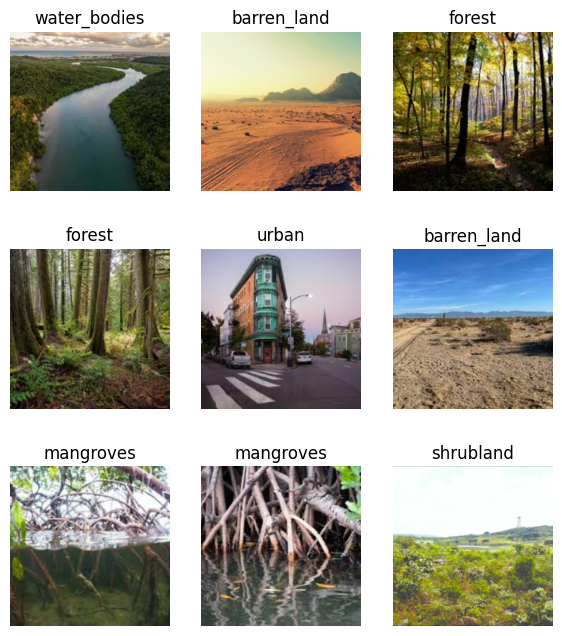

In [14]:
data.show_batch(nrows=3,figsize=(7,8))

In [15]:
#create cnn_learner object
# use resnet 34 for transfer learning
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 149MB/s]


In [16]:
# train 8 epochs of the model
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,3.806856,2.910217,0.912500,02:31
1,3.512858,1.840791,0.662500,02:04
2,3.008339,1.354751,0.487500,02:10
3,2.522681,1.186368,0.375000,02:01
4,2.130187,1.142364,0.312500,02:08
5,1.829728,1.135786,0.312500,02:06
6,1.603391,1.148247,0.300000,02:08
7,1.427245,1.161123,0.325000,02:06


In [ ]:
learn.save('model1_34', return_path=True)

In [ ]:
learn.unfreeze()

In [ ]:
# Define the path to the CSV files
kaggle_path = Path('gdrive/My Drive/Ai_Projects/SCD/kaggle')

# List all CSV files in the kaggle folder
csv_files = list(kaggle_path.glob('*.csv'))

# Read each CSV file into a pandas DataFrame
dataframes = []
for file in csv_files:
  df = pd.read_csv(file)
  print(f"First few rows of {file.name}:")
  print(df.head())
  print("\n")

In [ ]:
from pathlib import Path
p_path = Path('gdrive/My Drive/Ai_Projects/SCD') #Removed extra space before the variable declaration
for x in p_path.iterdir():
  print(x)

gdrive/My Drive/Ai_Projects/SCD/melanoma
gdrive/My Drive/Ai_Projects/SCD/BCC
gdrive/My Drive/Ai_Projects/SCD/SCC
gdrive/My Drive/Ai_Projects/SCD/actinic_keratosis
gdrive/My Drive/Ai_Projects/SCD/benign_nevi
gdrive/My Drive/Ai_Projects/SCD/seborrheic_keratosis
gdrive/My Drive/Ai_Projects/SCD/dermatofibroma
gdrive/My Drive/Ai_Projects/SCD/vascular_lesions
gdrive/My Drive/Ai_Projects/SCD/pyogenic_granuloma
gdrive/My Drive/Ai_Projects/SCD/lentigo
gdrive/My Drive/Ai_Projects/SCD/atypical_nevi
gdrive/My Drive/Ai_Projects/SCD/keratoacanthoma
gdrive/My Drive/Ai_Projects/SCD/merkel_cell_carcinoma
gdrive/My Drive/Ai_Projects/SCD/lichen_planus
gdrive/My Drive/Ai_Projects/SCD/solar_lentigo
gdrive/My Drive/Ai_Projects/SCD/models
gdrive/My Drive/Ai_Projects/SCD/Kaggle
